In [61]:
import pandas as pd

In [59]:
data = pd.read_csv('bank_transactions.csv.zip')

In [11]:
data.dropna(inplace=True)

In [10]:
data.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


In [53]:
data.CustomerDOB = pd.to_datetime(data.CustomerDOB)

In [34]:
data.TransactionDate = pd.to_datetime(data.TransactionDate)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 79.5+ MB


In [24]:
from datetime import datetime as dt

In [35]:
data.TransactionTime.apply(lambda x: dt.strptime(str(x).zfill(6), '%H%M%S').time())

0          14:32:07
1          14:18:58
2          14:27:12
3          14:27:14
4          18:11:56
             ...   
1048562    18:48:24
1048563    18:37:34
1048564    18:33:13
1048565    18:47:06
1048566    18:12:22
Name: TransactionTime, Length: 1048567, dtype: object

<AxesSubplot:>

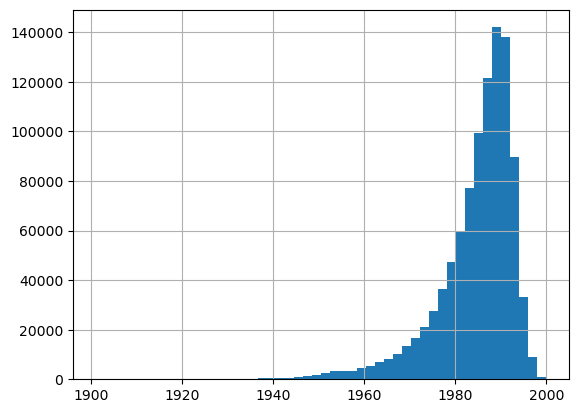

In [40]:
data.CustomerDOB.dt.year.hist(bins=50)

In [39]:
data.loc[data.CustomerDOB.dt.year > 2000, 'CustomerDOB'] = data.loc[data.CustomerDOB.dt.year > 2000, 'CustomerDOB'] - pd.DateOffset(years = 100)

In [38]:
data.drop(data[data.CustomerDOB.dt.year == 1800].index, axis = 0, inplace=True)

In [ ]:
data.

## Customer age

In [43]:
import numpy as np

In [44]:
np.timedelta64(1, 'Y')

numpy.timedelta64(1,'Y')

In [54]:
data['CustomerAge'] = (pd.to_datetime('today') - data.CustomerDOB) / np.timedelta64(1, 'Y').round(0)

TypeError: ufunc 'rint' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [48]:
data['CustomerAge']

0          28.144819
1          65.637718
2          25.990086
3          49.191110
4          34.666514
             ...    
1048562    32.303700
1048563    30.756782
1048564    33.516593
1048565    44.232761
1048566    38.557080
Name: CustomerAge, Length: 991228, dtype: float64

In [47]:
data['CustomerAge'] = data['CustomerAge'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

## Transaction amount

In [58]:
data[data['TransactionAmount (INR)']] = data[data['TransactionAmount (INR)']].astype(int)

KeyError: "None of [Float64Index([   25.0, 27999.0,   459.0,  2060.0,  1762.5,   676.0,   566.0,\n                148.0,   833.0,  289.11,\n              ...\n                615.0,   850.0,   765.0,  3000.0,  1500.0,   799.0,   460.0,\n                770.0,  1000.0,  1166.0],\n             dtype='float64', length=1048567)] are in the [columns]"

In [55]:
data.loc[data['TransactionAmount (INR)'] > 100, 'TransactionAmount (INR)'].value_counts()

200.00     31284
500.00     29243
1000.00    23459
300.00     16218
250.00     10283
           ...  
6122.23        1
473.88         1
2099.51        1
1123.51        1
5259.00        1
Name: TransactionAmount (INR), Length: 87694, dtype: int64

## Customer transactions

<AxesSubplot:ylabel='Frequency'>

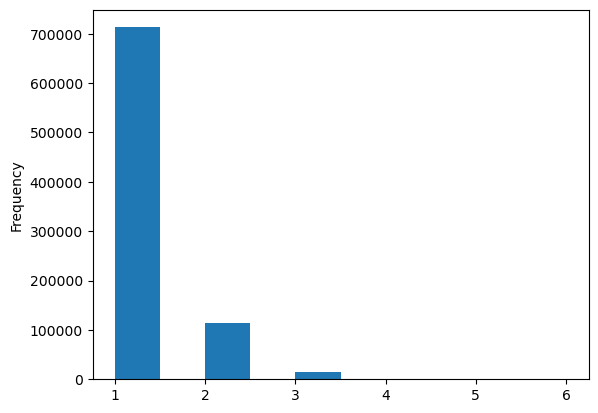

In [42]:
data.groupby('CustomerID').TransactionID.count().plot.hist()

## Utilisation

In [ ]:
data['Utilisation'] = data['CustAccaountBalance'] - data['TransactionAccount']

# Clustering

In [63]:
data.groupby('CustomerID').CustomerAge.last()

AttributeError: 'DataFrameGroupBy' object has no attribute 'CustomerAge'

In [64]:
data.groupby('CustomerID').CustAccountBalance.last()

CustomerID
C1010011    120180.54
C1010012     24204.49
C1010014    161848.76
C1010018       496.18
C1010024     87058.65
              ...    
C9099836    133067.23
C9099877     96063.46
C9099919      5559.75
C9099941     35295.92
C9099956      6968.93
Name: CustAccountBalance, Length: 884265, dtype: float64

In [ ]:
age_balance = data[['CustomerID', 'CustomerAge', 'CustAccountBalance']].groupby('CustomerID')

In [ ]:
sns.scatterpllot(x=age_balance.CustomerAge, y=age_balance.CustAccountBalance)

In [65]:
from scipy.cluster.hierarchy import dendogram, linkage

ImportError: cannot import name 'dendogram' from 'scipy.cluster.hierarchy' (c:\Users\engri\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py)

In [ ]:
age_balance = age_balance.sample(1000)

In [ ]:
dend = dendogram( linkage(age_balance_sample, method ='ward'))

In [66]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')

In [ ]:
age_balance_sample['cluster'] = model.fit_predict(age_balance_sample)

In [ ]:
sns.scatterpllot(x=age_balance_sample.CustomerAge, y=age_balance_sample.CustAccountBalance, hue=age_balance_sample.cluster)

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(data.CustAccountBalance)

In [ ]:
data.drop(data.loc[data['Transaction (INR)'] > 500].index, axis=0, inplace=True)


In [ ]:
from sklearn import KMeans

In [ ]:
model = KMeans(n_clusters=8)

In [ ]:
age_balance_sample['cluster'] = model.fit_predict(age_balance_sample)

#### Elbow method to obtain k

In [ ]:
sd = {}
for k in range(10,20):
    model = KMeans(n_clusters=k)
    model.fit(age_balance_sample)
    sd[k] = model.inertia_

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure()
plt.plot(list(sd.keys()), list(sd.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Cost function')
plt.title('Elbow method')
plt.show()

#### Installing yellowbrick to visualize the algorithm of the machine learning algorithms

In [ ]:
from yellowbrick.cluster import make_blobs

In [ ]:
model =KMeans()
visualizer = KEl

look at silhouette visualization and Interclusterdistance

we should do a binary search to find the real optimal value of k

In [ ]:
data[['TransactionAmount (INR)','CustomerID','Customer',Agedata.groupby('CustomerID')